In [14]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
%matplotlib inline

### 0. Basic info and description

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


- No missing values

In [6]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
test_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


- Both train and test dataframes seem to have similar distribution

### 1. Check for missing values

In [8]:
print("Missing values in train dataset:\n", train_df.isnull().sum())
print("Missing values in test dataset:\n", test_df.isnull().sum())

Missing values in train dataset:
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Missing values in test dataset:
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


### 2. Unique values in each column

In [9]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    print(f"Unique values in {col} (train):\n", train_df[col].value_counts())
    print(f"Unique values in {col} (test):\n", test_df[col].value_counts())

Unique values in person_home_ownership (train):
 person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
Unique values in person_home_ownership (test):
 person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64
Unique values in loan_intent (train):
 loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
Unique values in loan_intent (test):
 loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64
Unique values in loan_grade (train):
 loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
Unique values in loan_grade (test):
 loa

### 3. Heatmap (Correlation)

In [10]:
# Identify numerical and categorical columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('loan_status')  # Exclude target variable from features
numerical_columns.remove('id')
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

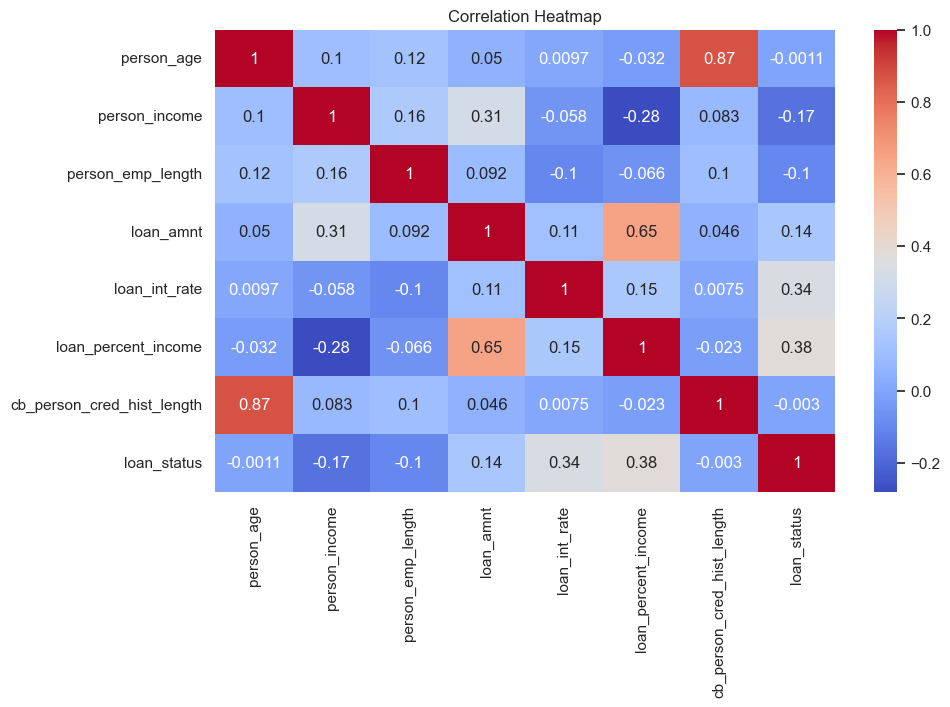

In [20]:
correlation_matrix = train_df[numerical_columns + ['loan_status']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4. Target Variable Distribution

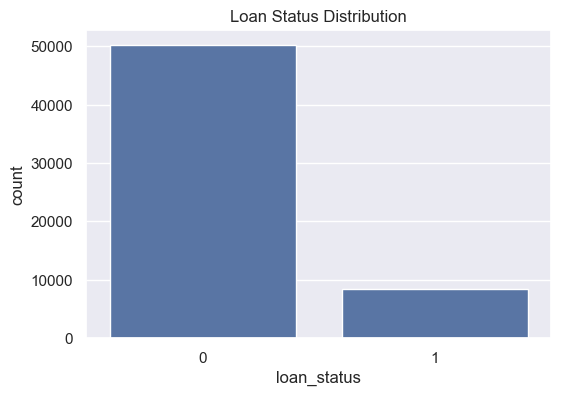

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df['loan_status'])
plt.title('Loan Status Distribution')
plt.show()

### 5. Outlier detection

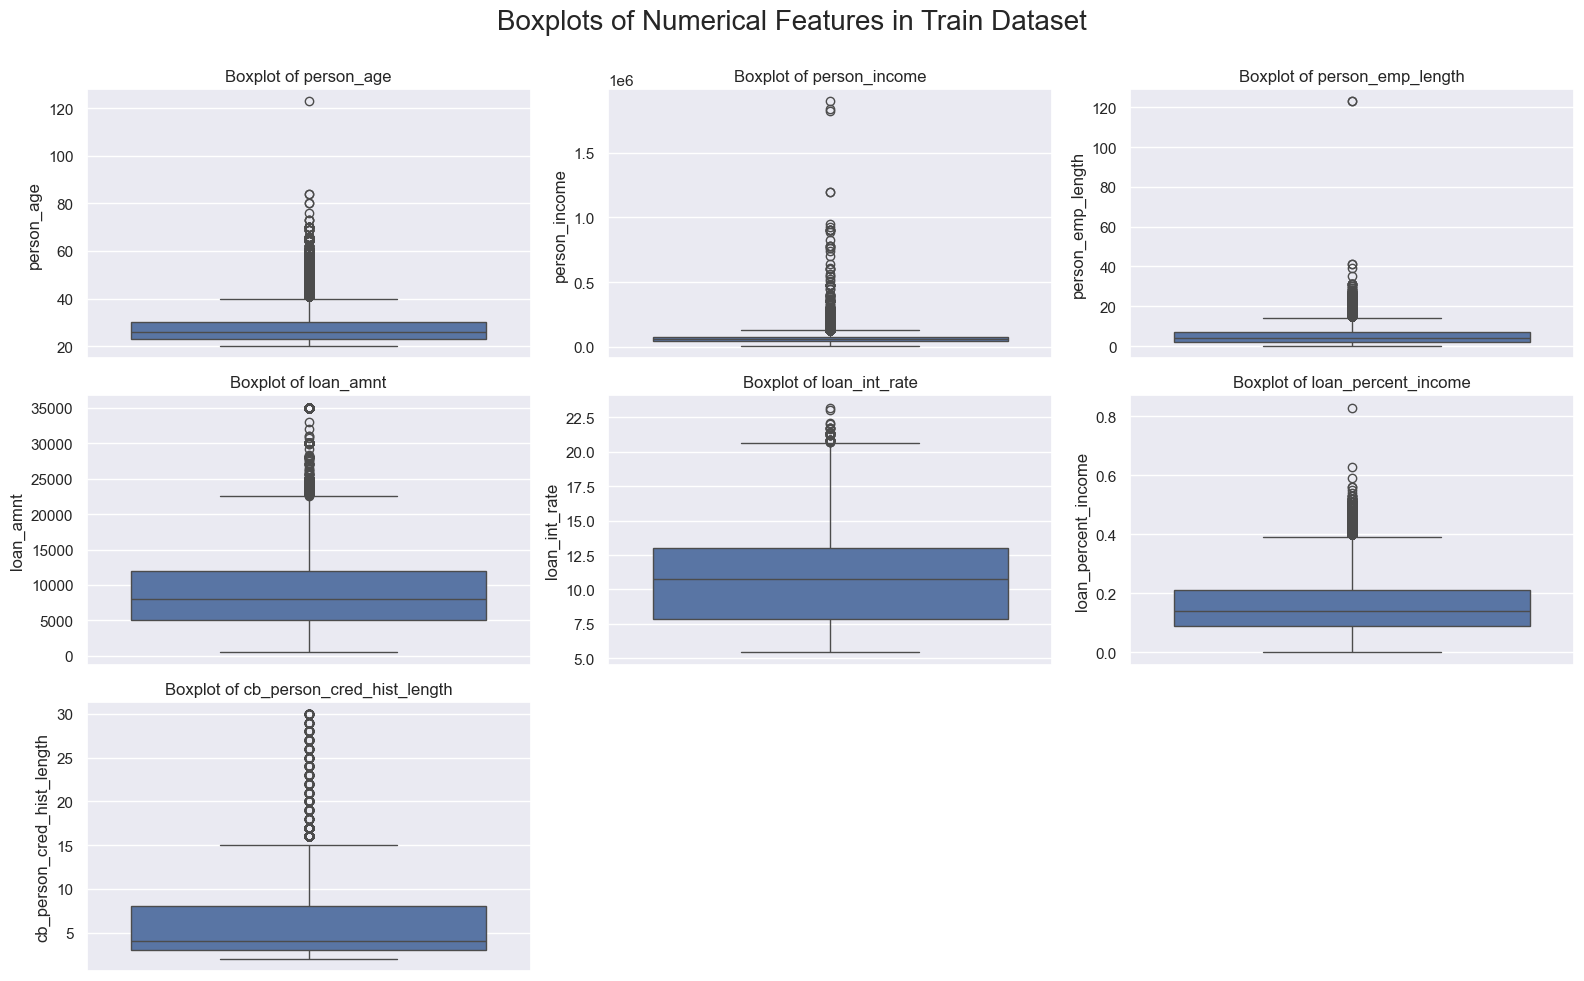

In [15]:
num_plots = len(numerical_columns)
n_cols = 3
n_rows = math.ceil(num_plots / n_cols)

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features in Train Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

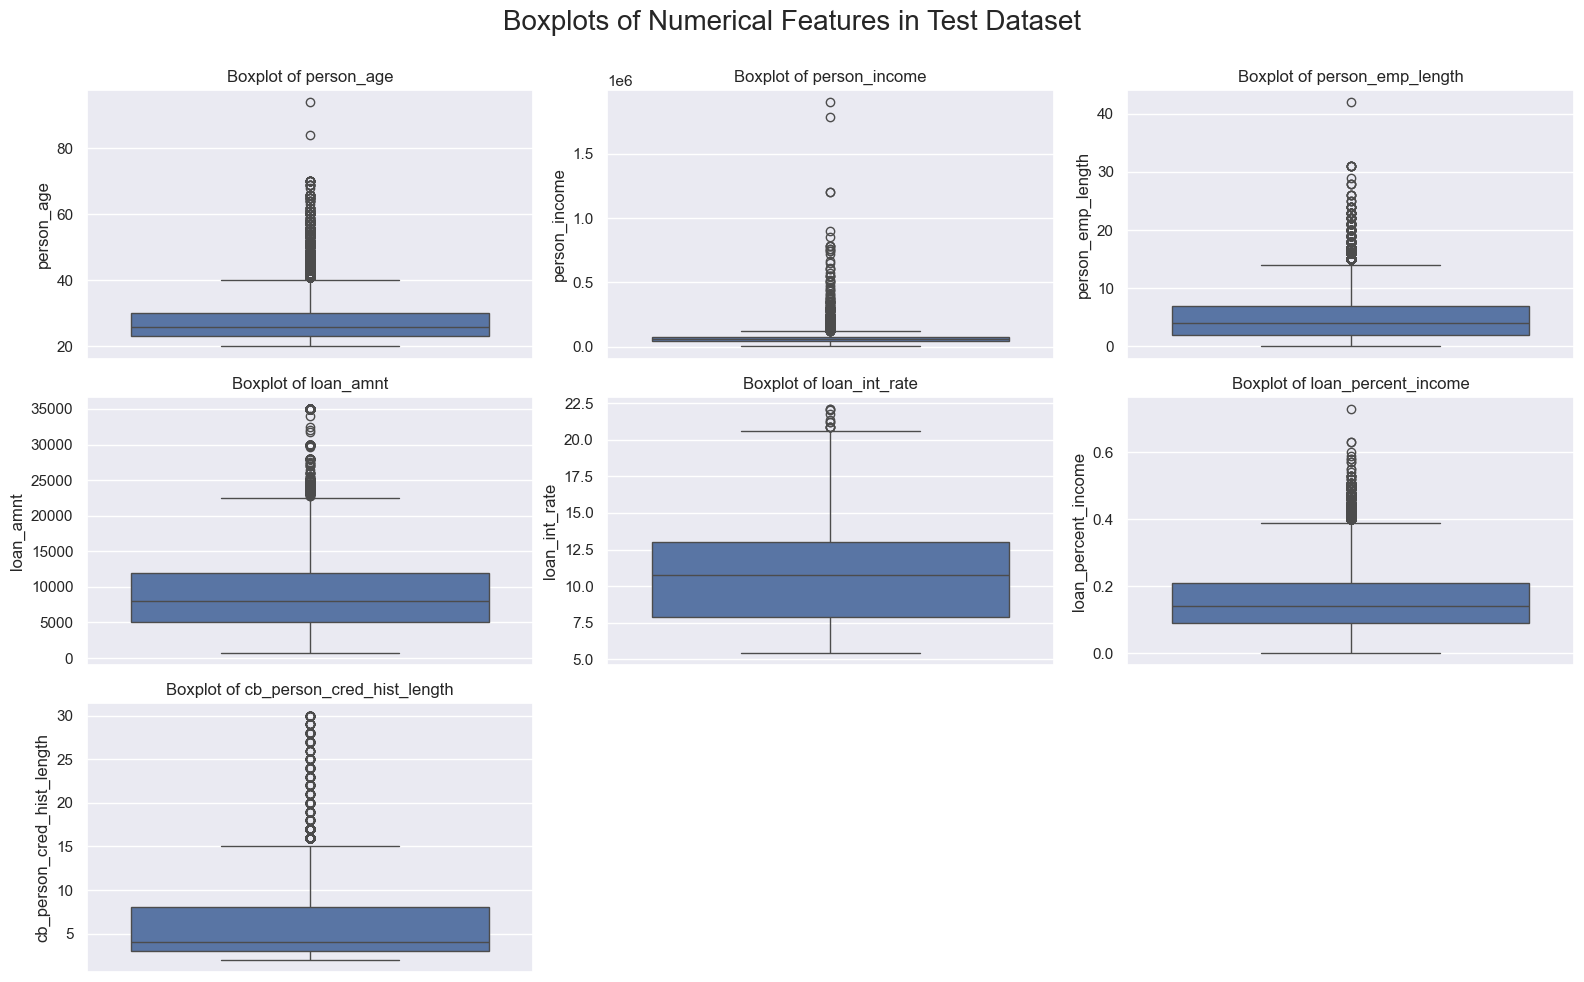

In [16]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=test_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features in Test Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

### 6. Categorical Variable Distribution

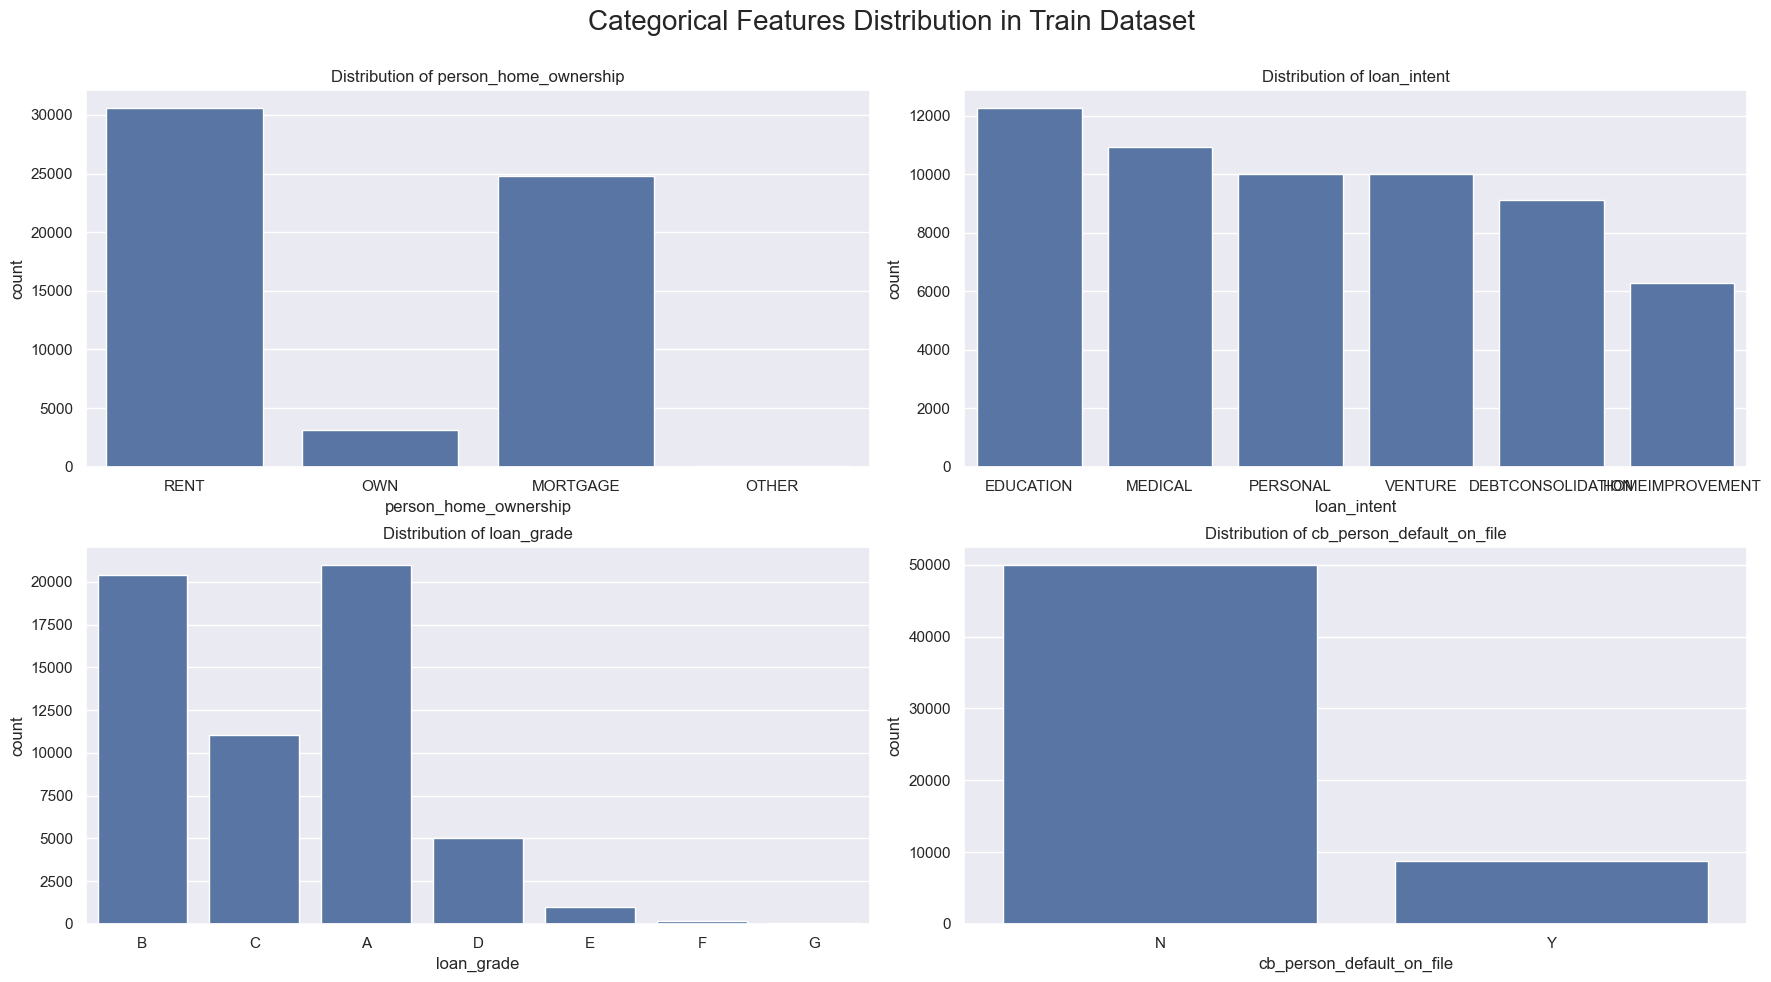

In [17]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=train_df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Categorical Features Distribution in Train Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

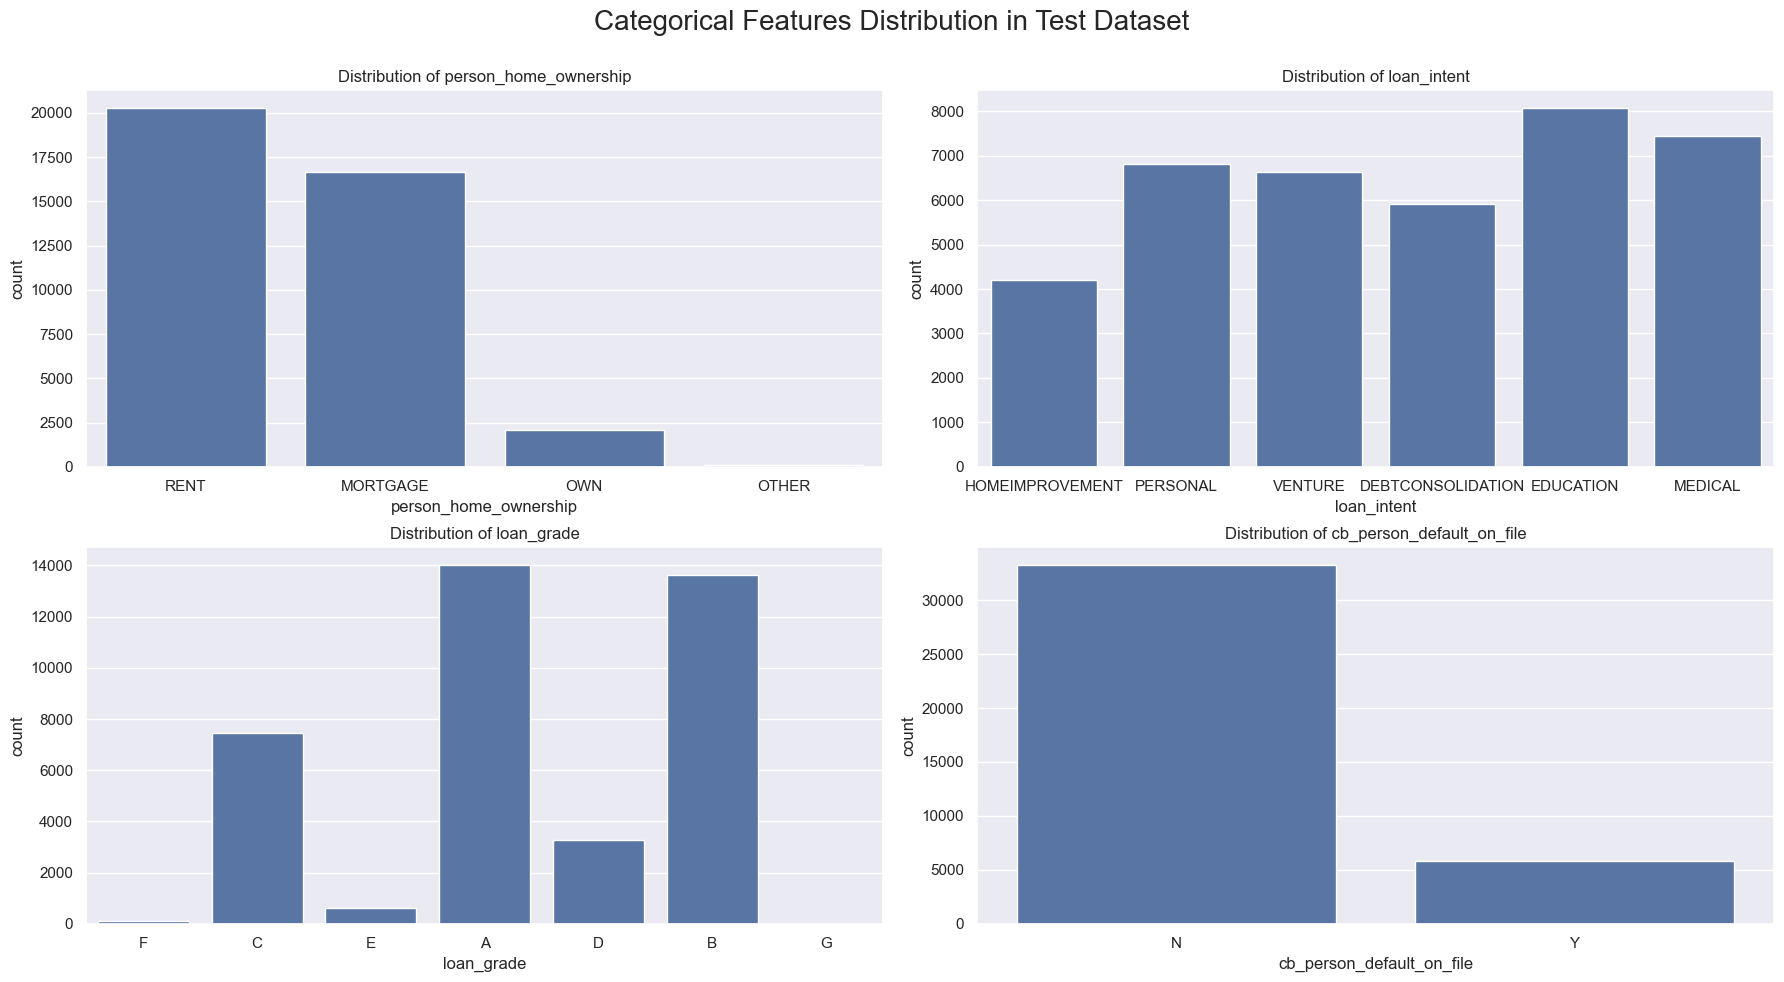

In [18]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=test_df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Categorical Features Distribution in Test Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

### 7. Scatter PLots for Numerical Features vs loan_status

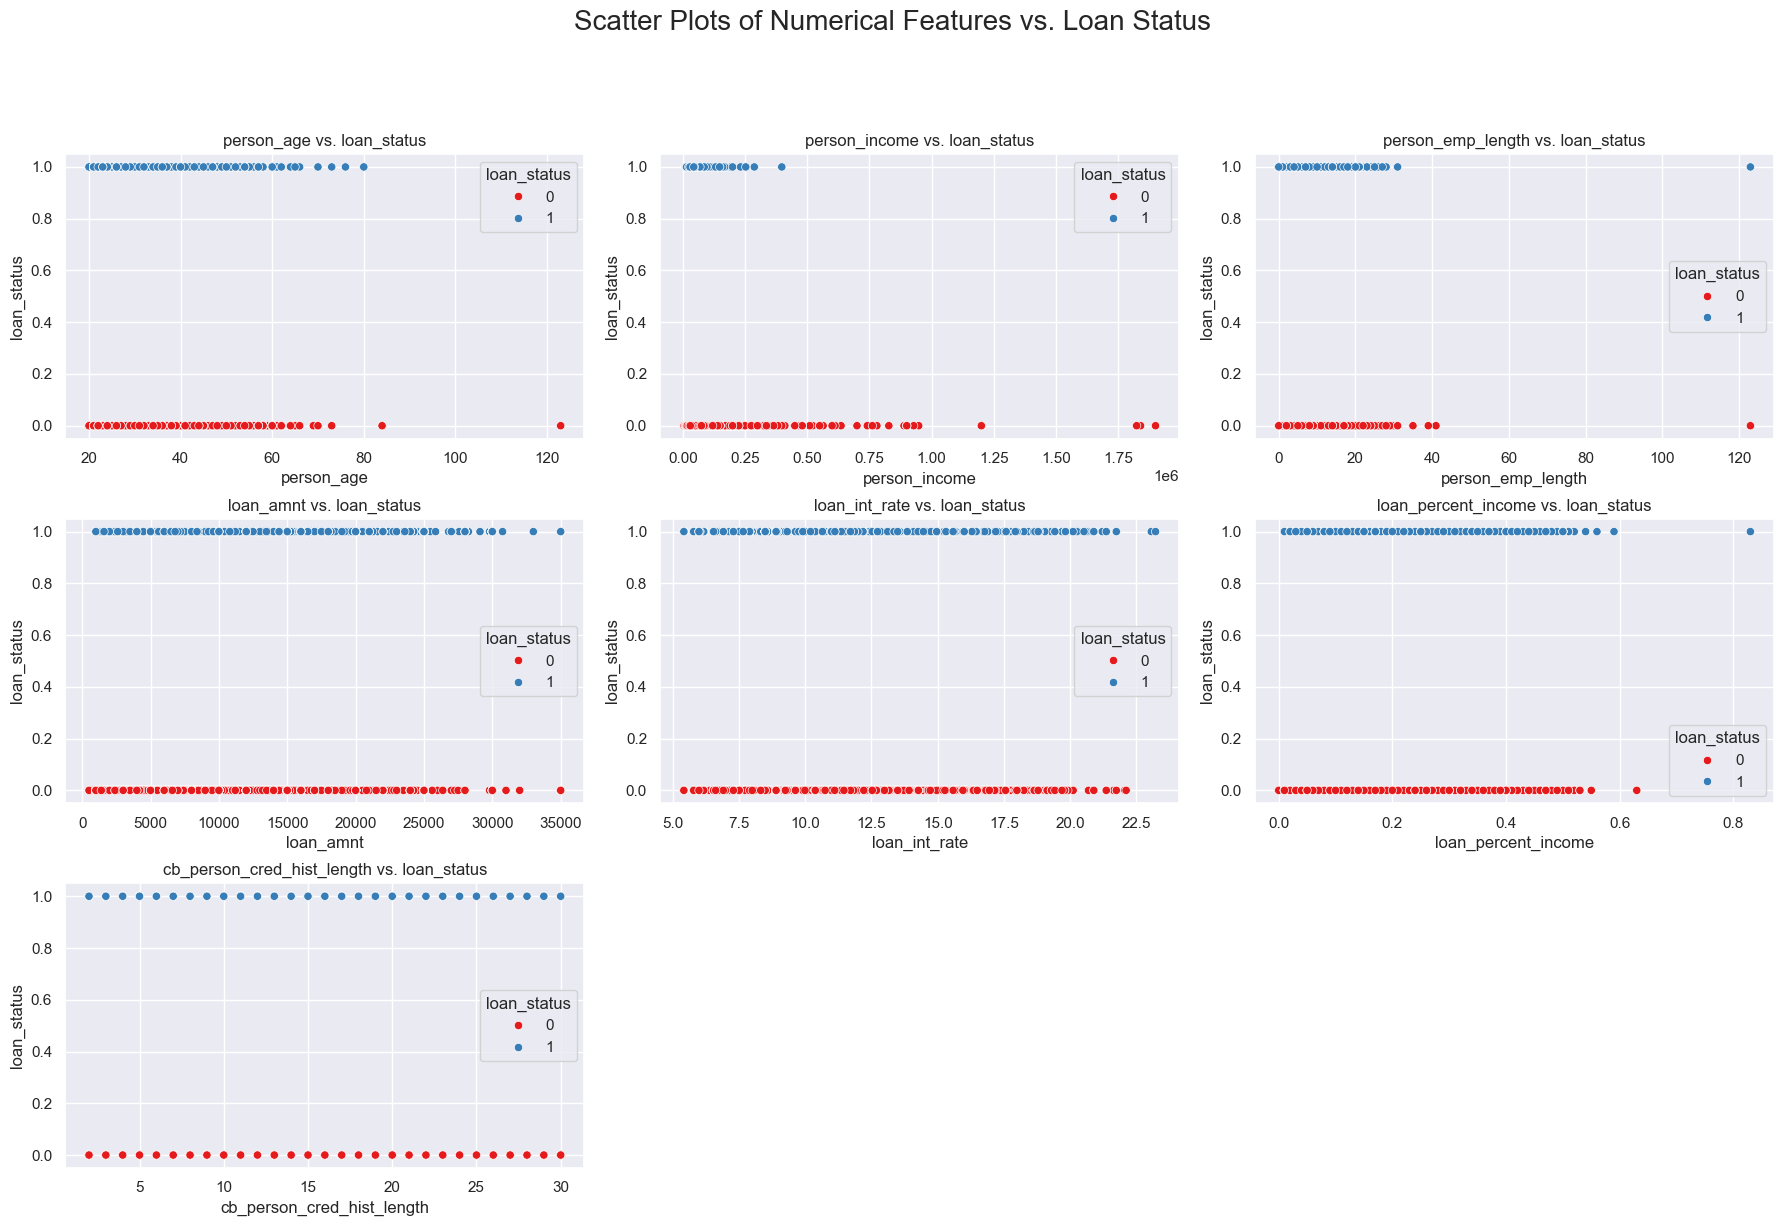

In [25]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=train_df[col], y=train_df['loan_status'], ax=axes[i], hue=train_df['loan_status'], palette='Set1')
    axes[i].set_title(f'{col} vs. loan_status')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Scatter Plots of Numerical Features vs. Loan Status', fontsize=20, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()

### 8. Bivariate Analysis: Numerical vs. Categorical

Bivariate Analysis: Numerical vs. Categorical


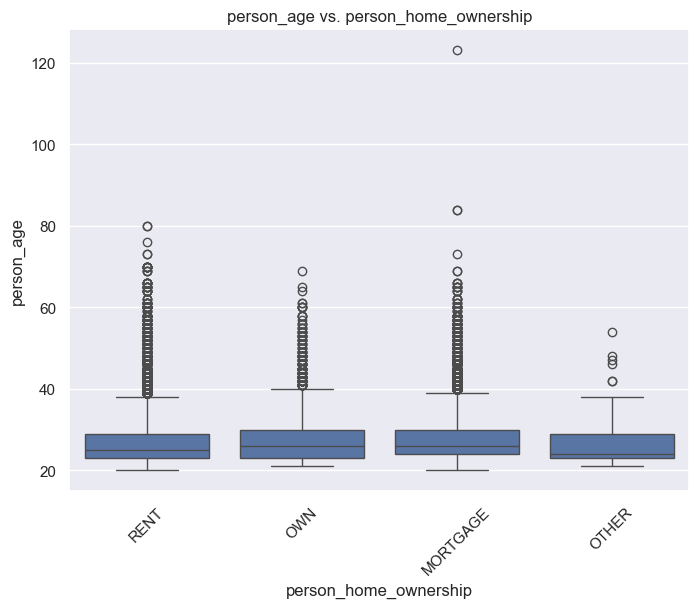

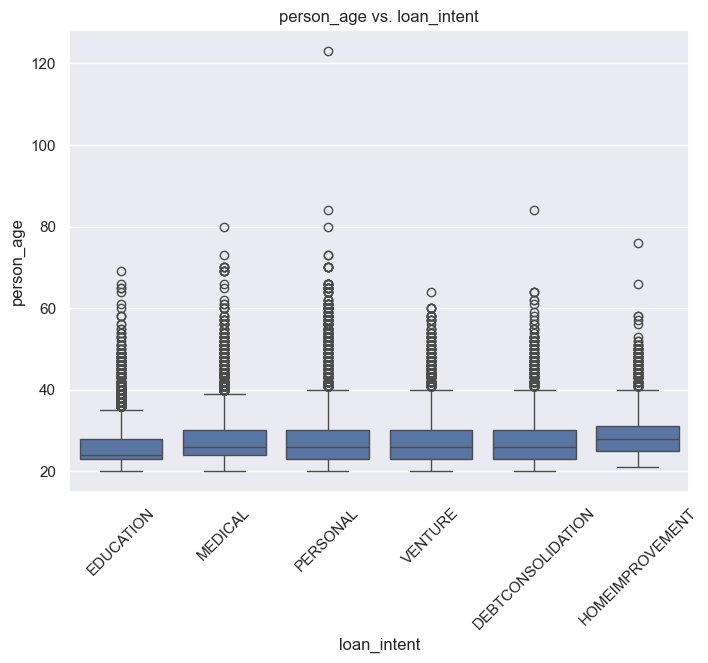

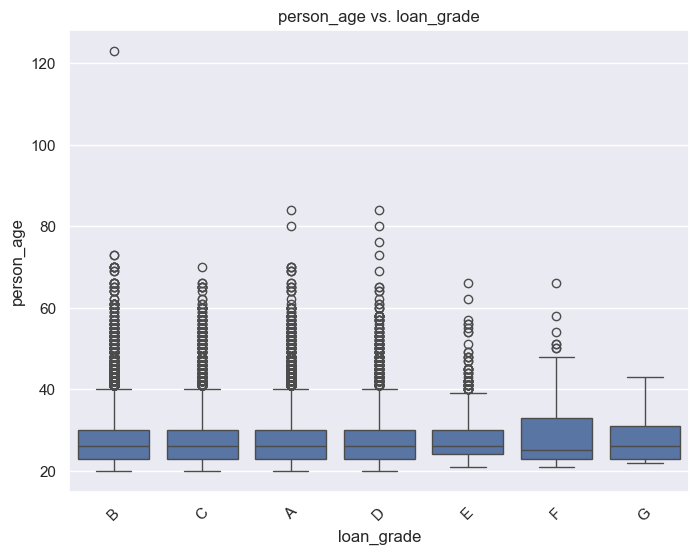

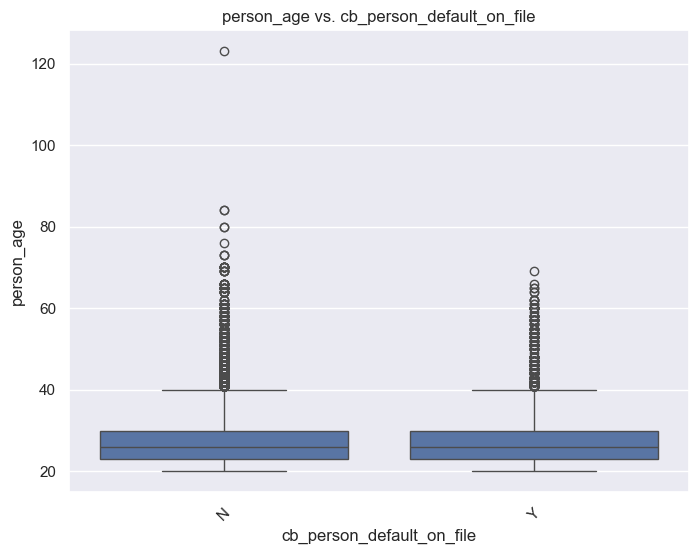

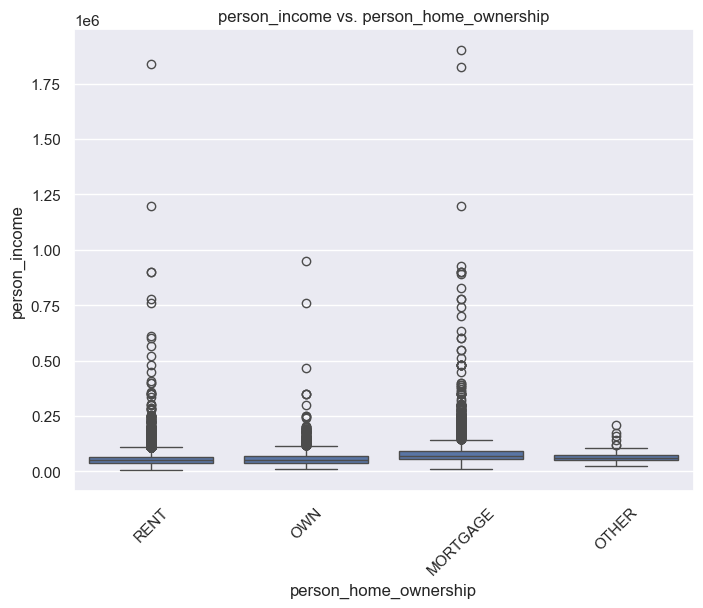

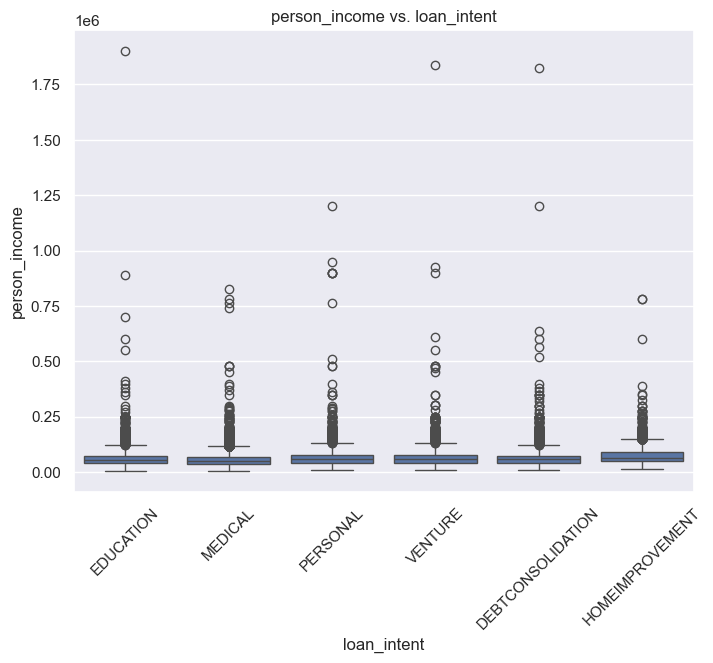

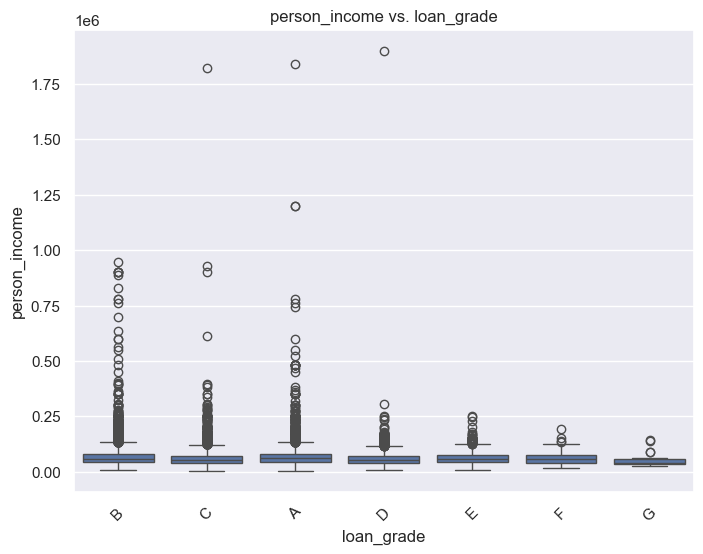

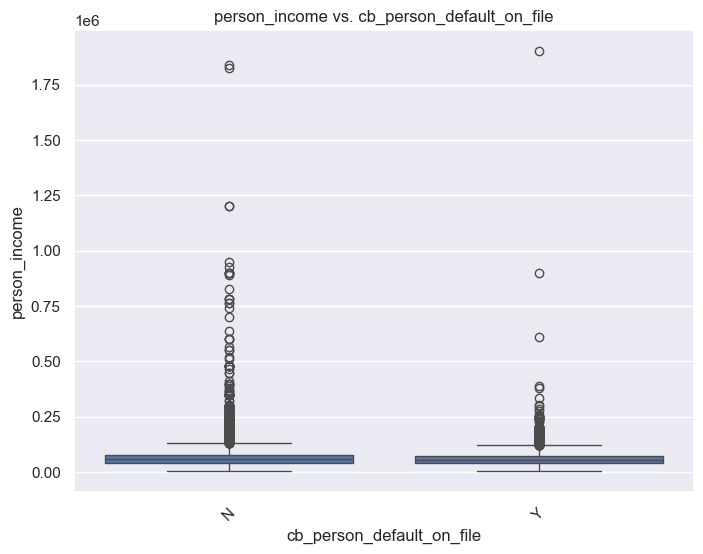

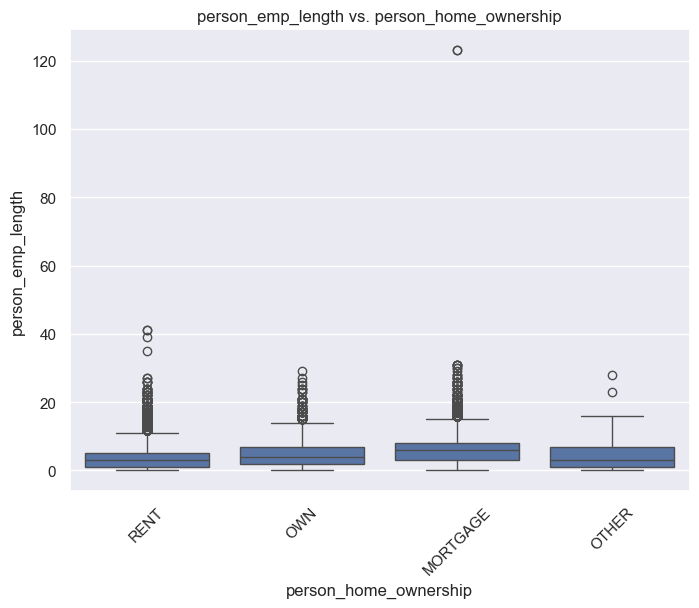

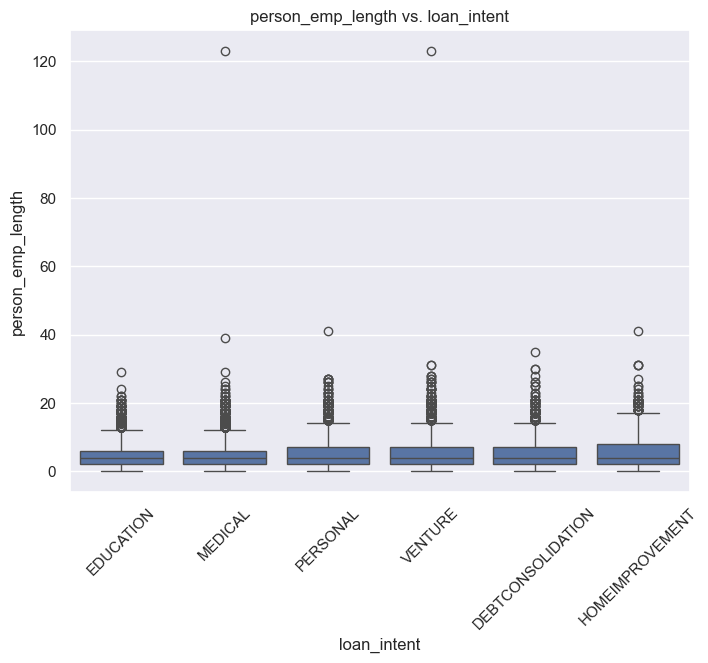

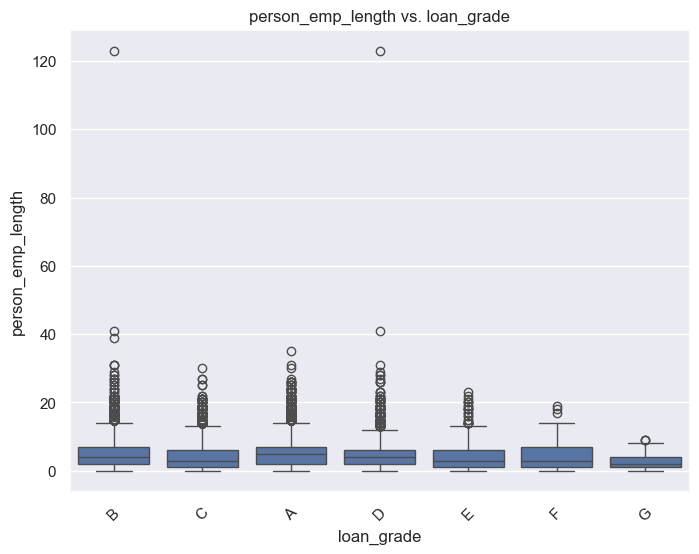

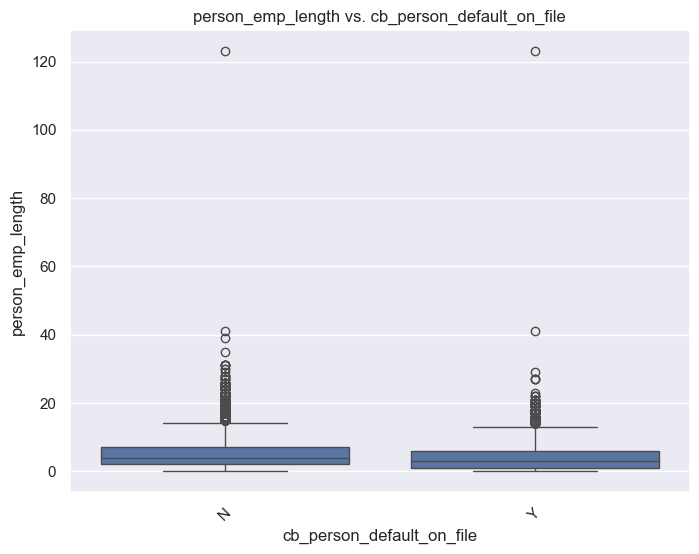

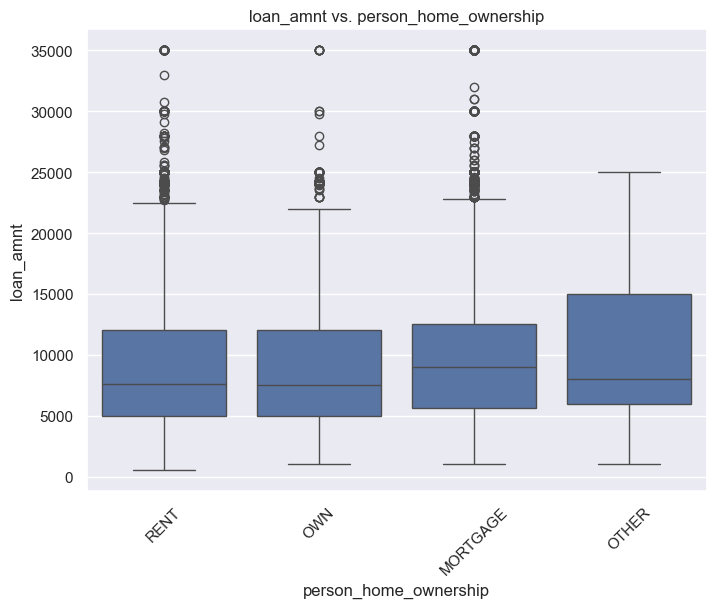

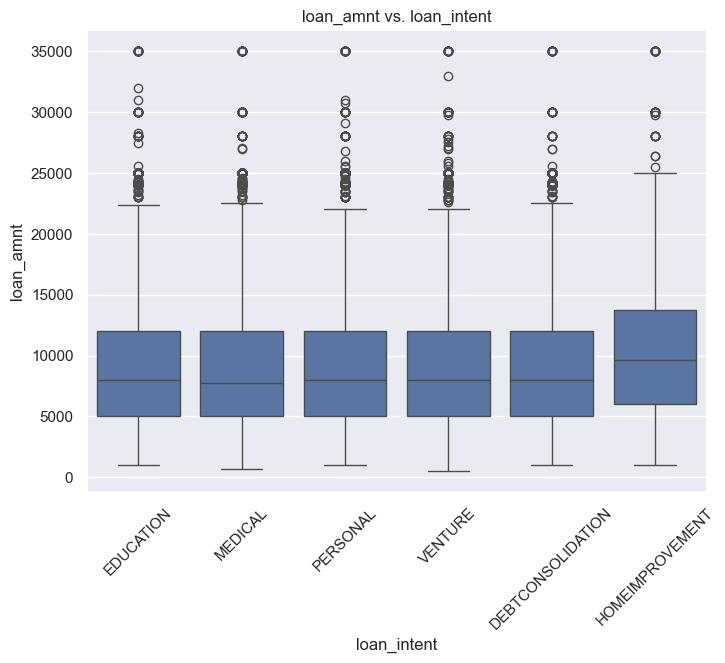

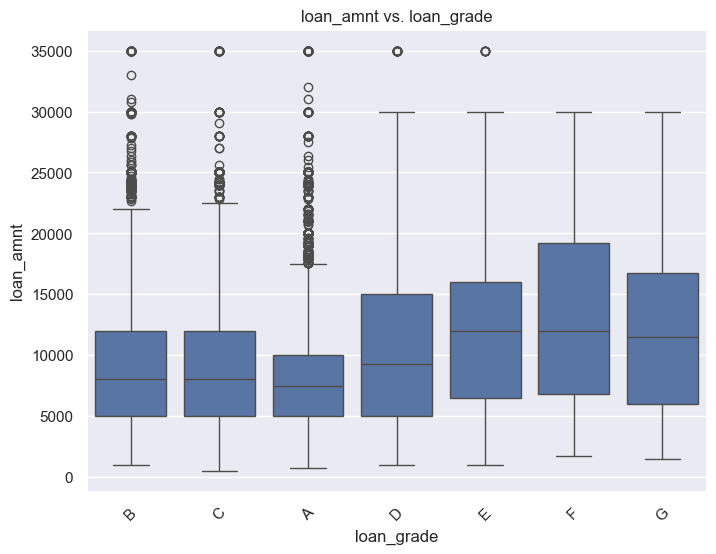

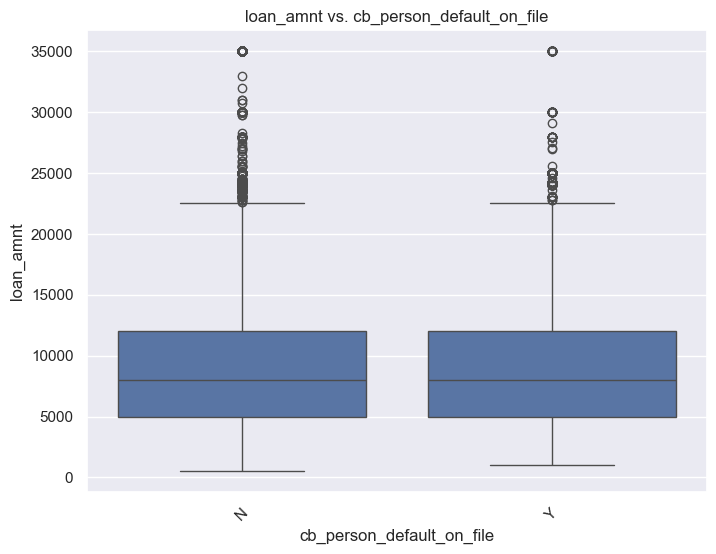

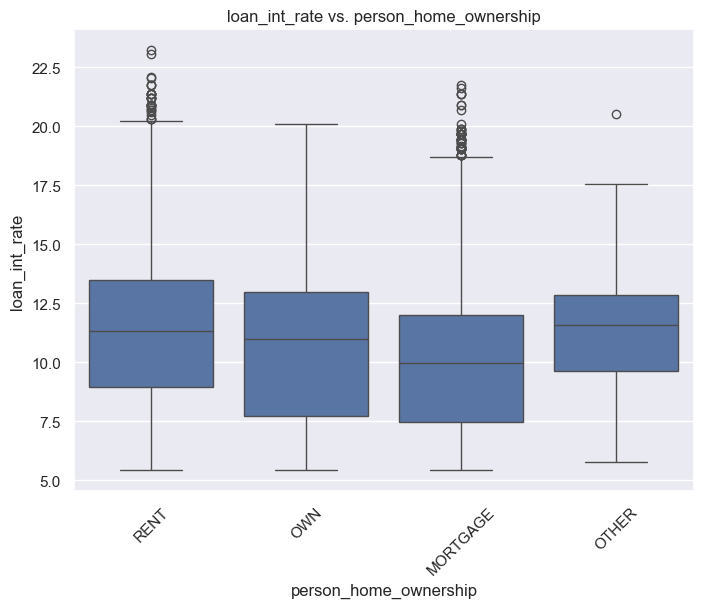

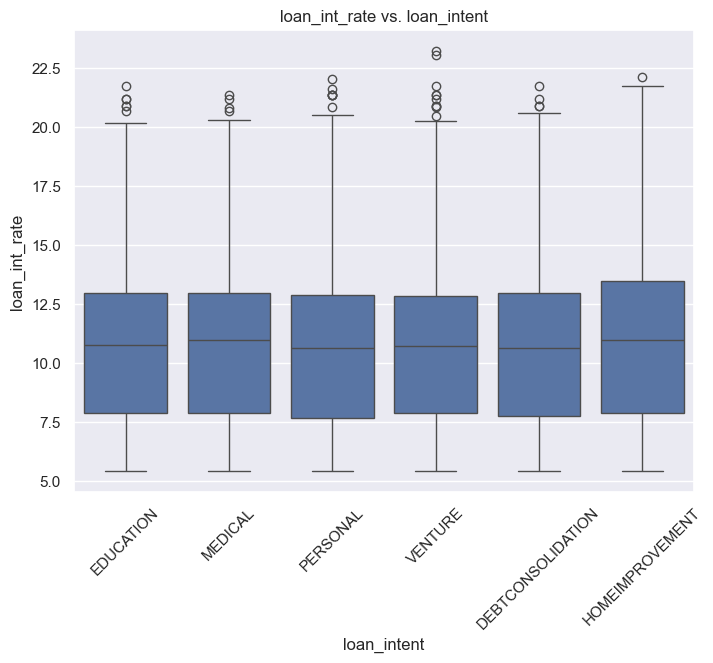

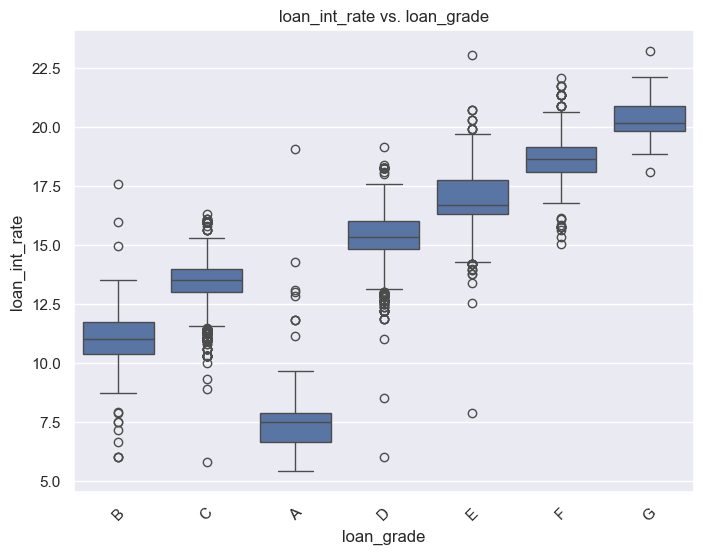

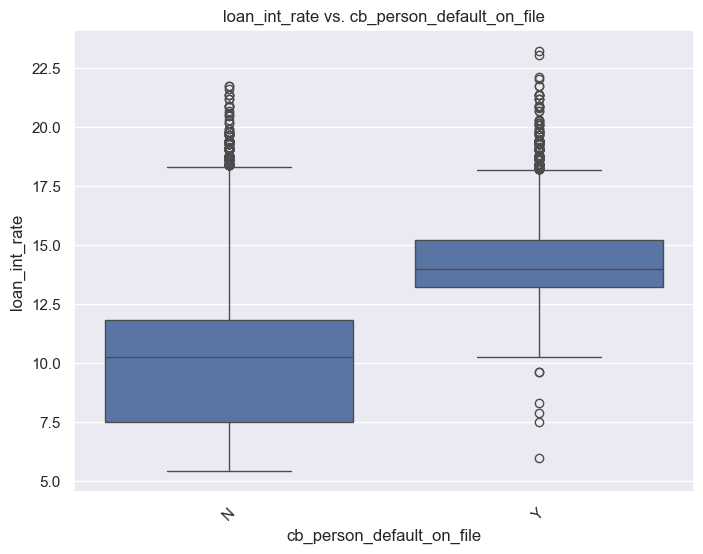

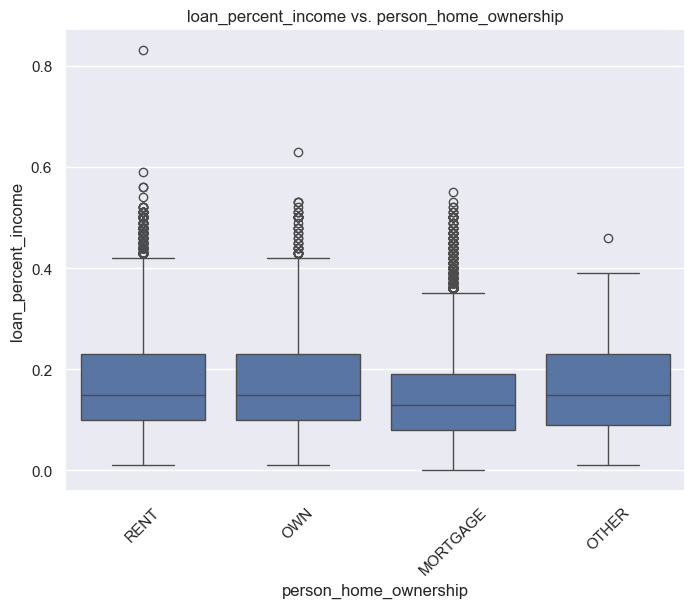

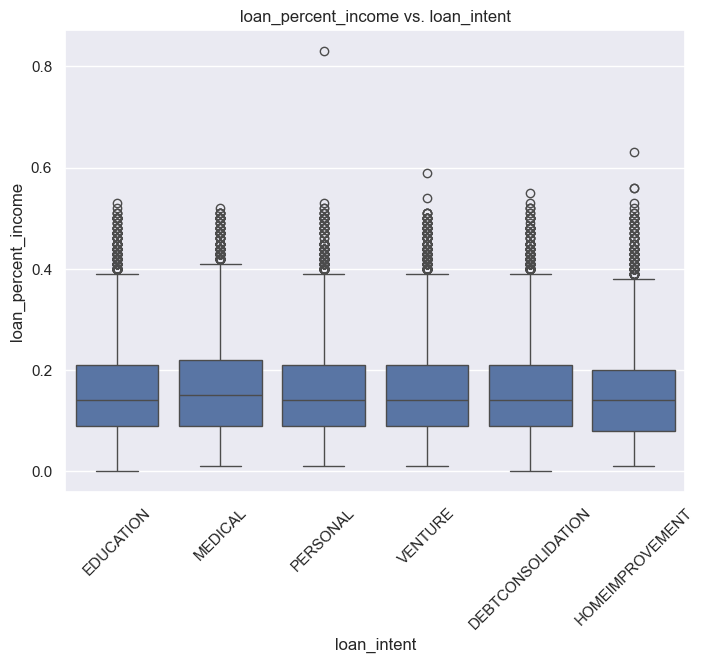

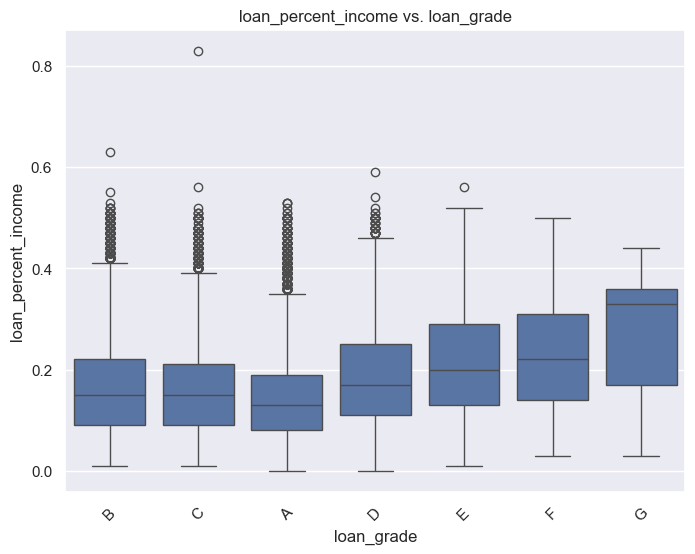

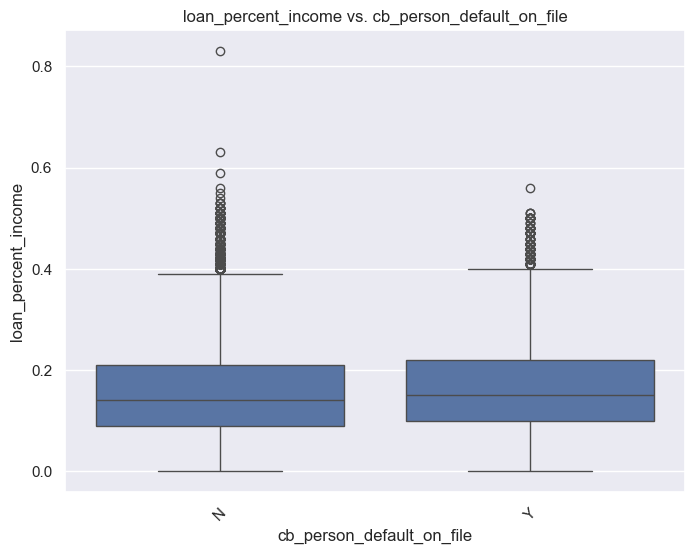

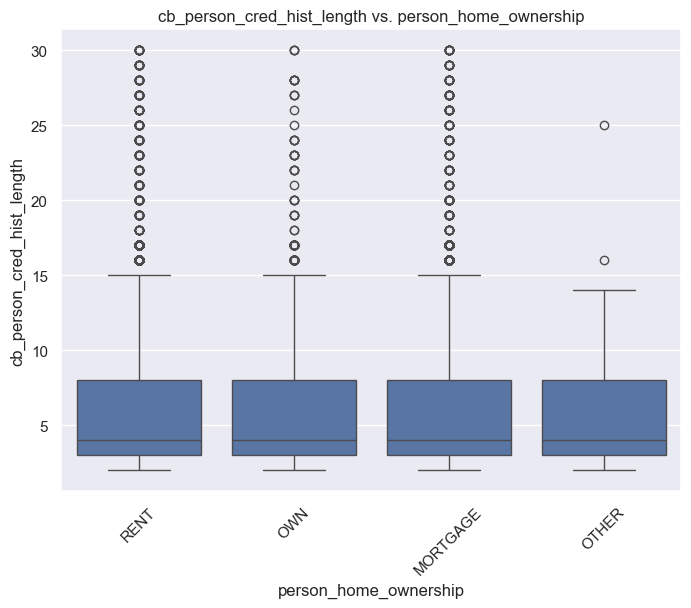

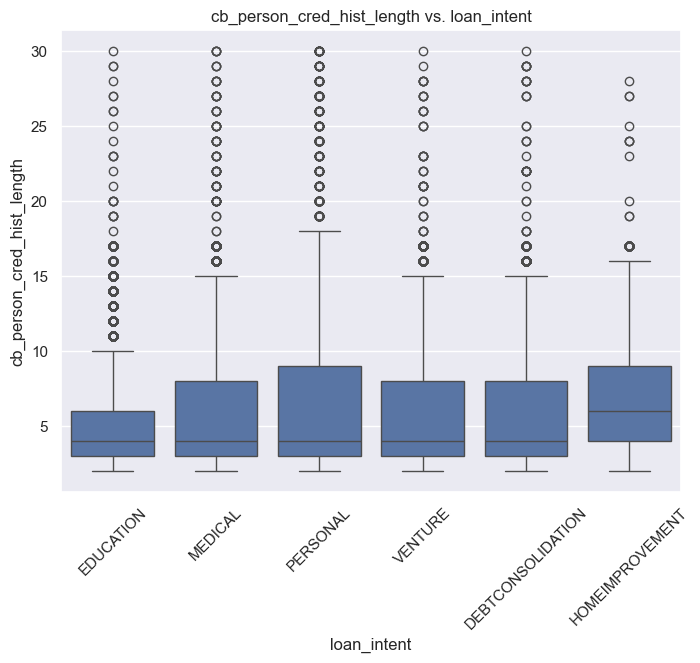

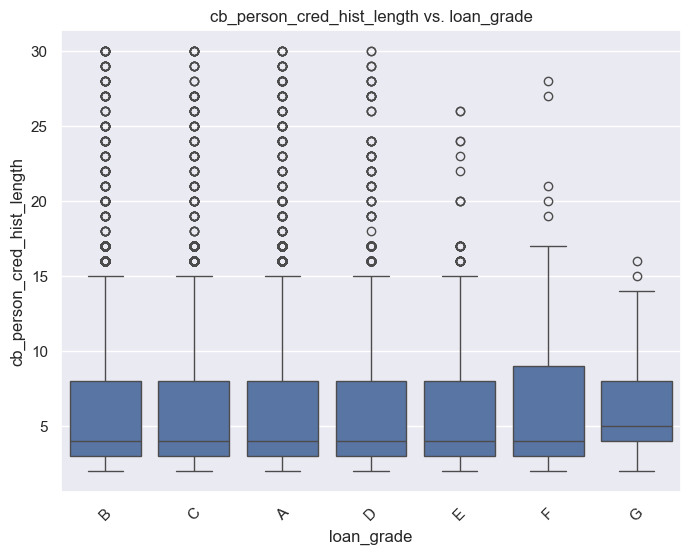

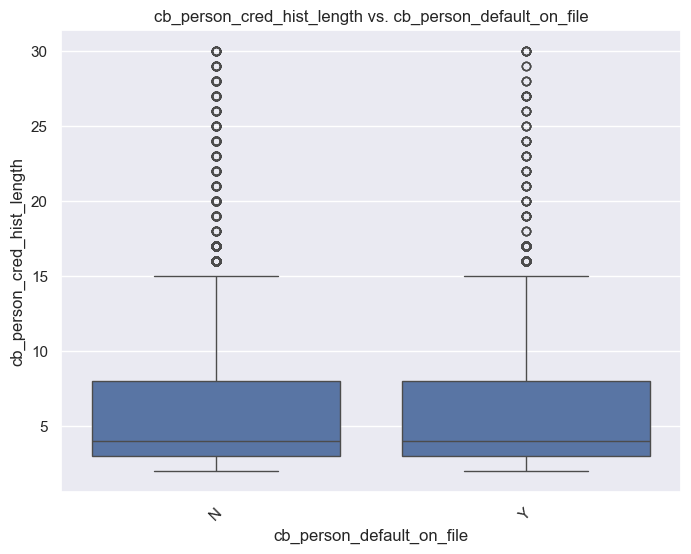

In [26]:
print("Bivariate Analysis: Numerical vs. Categorical")

num_plots = len(numerical_columns) * len(categorical_columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

# Plot boxplots for each combination of numerical and categorical columns
plot_num = 0
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        sns.boxplot(x=train_df[cat_col], y=train_df[num_col], ax=axes[plot_num])
        axes[plot_num].set_title(f'{num_col} vs. {cat_col}')
        axes[plot_num].tick_params(axis='x', rotation=45)
        plot_num += 1

# Hide any extra subplots if there are more subplots than necessary
for j in range(plot_num, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.suptitle('Boxplots of Numerical vs. Categorical Features', fontsize=20, y=1.02)
plt.subplots_adjust(top=0.93)
plt.show()